<a href="https://colab.research.google.com/github/cnnwosu200/claims-analysis/blob/main/claims_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [94]:
# Plot settings

plt.rcParams['figure.figsize'] = (10,6)
sns.set(style='whitegrid')

In [95]:
# FILE PATHS

DATA_DIR = Path('/content')
HEADER_CSV = DATA_DIR / 'STONYBRK_20240531_HEADER.csv'
LINE_CSV = DATA_DIR / 'STONYBRK_20240531_LINE.csv'
CODE_CSV = DATA_DIR / 'STONYBRK_20240531_CODE.csv'

# Part 1: Data Loading and Exploration

In [96]:
# Load the three CSV files

print('\nLoading CSV files...')


df_header = pd.read_csv(HEADER_CSV, low_memory=False)
df_line = pd.read_csv(LINE_CSV, low_memory=False)
df_code = pd.read_csv(CODE_CSV, low_memory=False)


print('Loaded: df_header={}, df_line={}, df_code={}'.format(df_header.shape, df_line.shape, df_code.shape))


Loading CSV files...
Loaded: df_header=(388, 43), df_line=(520, 28), df_code=(1536, 9)


## Explore HEADER file

In [97]:
# Explore HEADER File

print("="*60)
print("HEADER FILE EXPLORATION")
print("="*60)

HEADER FILE EXPLORATION


In [98]:
# Number of Columns and Rows

print(f"\nShape: {df_header.shape}")
print(f"Rows: {df_header.shape[0]:,} | Columns: {df_header.shape[1]}")


Shape: (388, 43)
Rows: 388 | Columns: 43


In [99]:
# First 5 rows

print("\n--- First 5 Rows ---")
display(df_header.head())


--- First 5 Rows ---


,ClientId,ProspectiveClaimId,ClaimType,BillingProviderNPI,BillingProvFirstName,BillingProvLastName,AttendingProviderNPI,AttendingProvFirstName,AttendingProvLastName,RenderingProviderNPI,...,Facility_Location,CoderId,CoderName,PlaceOfService,WorkQueName,WorkQueId,ClinicalTrialIdentifier,PriorAuthorizationNo,InvestDeviceExmptNo,ReferralNo
0,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
1,49,35235657,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
2,49,35249003,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
3,49,35249014,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
4,49,35249016,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN


In [100]:
# Column names and data types

print("\n--- Column Names and Data Types ---")
print(df_header.dtypes)



--- Column Names and Data Types ---
ClientId                     int64
ProspectiveClaimId           int64
ClaimType                   object
BillingProviderNPI           int64
BillingProvFirstName        object
BillingProvLastName        float64
AttendingProviderNPI       float64
AttendingProvFirstName      object
AttendingProvLastName       object
RenderingProviderNPI         int64
RenderingProvFirstName      object
RenderingProvLastName       object
ReferringProviderNPI       float64
ReferringProvFirstName      object
ReferringProvLastName       object
OperatingProviderNPI       float64
OperatingProvFirstName     float64
OperatingProvLastName      float64
ServiceFromDate             object
ServiceToDate               object
PrimaryPayerName            object
PrimaryPayerCode             int64
PrimaryPayerCFI             object
SecondaryPayer             float64
SecondaryPayerCode         float64
SecondaryPayerCFI          float64
TertianaryPayer            float64
TertianaryPayerCod

In [101]:
# Missing value counts

print("\n--- Missing Value Counts ---")
print(df_header.isnull().sum())


--- Missing Value Counts ---
ClientId                     0
ProspectiveClaimId           0
ClaimType                    0
BillingProviderNPI           0
BillingProvFirstName         0
BillingProvLastName        388
AttendingProviderNPI       386
AttendingProvFirstName     386
AttendingProvLastName      386
RenderingProviderNPI         0
RenderingProvFirstName       0
RenderingProvLastName        0
ReferringProviderNPI       301
ReferringProvFirstName     301
ReferringProvLastName      301
OperatingProviderNPI       388
OperatingProvFirstName     388
OperatingProvLastName      388
ServiceFromDate              0
ServiceToDate                0
PrimaryPayerName             0
PrimaryPayerCode             0
PrimaryPayerCFI              0
SecondaryPayer             388
SecondaryPayerCode         388
SecondaryPayerCFI          388
TertianaryPayer            388
TertianaryPayerCode        388
TertianaryPayerCFI         388
DRG                        388
AdmitType                  388
Discharge

In [102]:
# Basic descriptive statistics for numeric columns

print("\n--- Basic Statistics ---")
display(df_header.describe(include='all'))


--- Basic Statistics ---


,ClientId,ProspectiveClaimId,ClaimType,BillingProviderNPI,BillingProvFirstName,BillingProvLastName,AttendingProviderNPI,AttendingProvFirstName,AttendingProvLastName,RenderingProviderNPI,...,Facility_Location,CoderId,CoderName,PlaceOfService,WorkQueName,WorkQueId,ClinicalTrialIdentifier,PriorAuthorizationNo,InvestDeviceExmptNo,ReferralNo
count,388.0,3.880000e+02,388,3.880000e+02,388,0.0,2.000000e+00,2,2,3.880000e+02,...,388,388.0,388,388.000000,388,388.000000,388.0,0.0,0.0,0.0
unique,NaN,NaN,1,NaN,7,NaN,NaN,2,2,NaN,...,5,NaN,1,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,P,NaN,SB INTERNISTS,NaN,NaN,YUEHJIEN,GU,NaN,...,INPATIENT,NaN,TESNJ,NaN,COMPLIANCE PREAUDIT,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,388,NaN,152,NaN,NaN,1,1,NaN,...,231,NaN,388,NaN,320,NaN,NaN,NaN,NaN,NaN
mean,49.0,3.670543e+07,NaN,1.462851e+09,NaN,NaN,1.472878e+09,NaN,NaN,1.565732e+09,...,NaN,4.0,NaN,17.664948,NaN,316.175258,0.0,NaN,NaN,NaN
std,0.0,3.562317e+05,NaN,3.247005e+08,NaN,NaN,6.069869e+08,NaN,NaN,2.863497e+08,...,NaN,0.0,NaN,4.798913,NaN,0.380678,0.0,NaN,NaN,NaN
min,49.0,3.521699e+07,NaN,1.063469e+09,NaN,NaN,1.043673e+09,NaN,NaN,1.003467e+09,...,NaN,4.0,NaN,11.000000,NaN,316.000000,0.0,NaN,NaN,NaN
25%,49.0,3.669166e+07,NaN,1.154376e+09,NaN,NaN,1.258275e+09,NaN,NaN,1.295152e+09,...,NaN,4.0,NaN,11.000000,NaN,316.000000,0.0,NaN,NaN,NaN
50%,49.0,3.683352e+07,NaN,1.437106e+09,NaN,NaN,1.472878e+09,NaN,NaN,1.467003e+09,...,NaN,4.0,NaN,21.000000,NaN,316.000000,0.0,NaN,NaN,NaN
75%,49.0,3.688171e+07,NaN,1.821036e+09,NaN,NaN,1.687480e+09,NaN,NaN,1.902082e+09,...,NaN,4.0,NaN,21.000000,NaN,316.000000,0.0,NaN,NaN,NaN


## Explore LINE file

In [103]:
# Explore LINE File

print("="*60)
print("LINE FILE EXPLORATION")
print("="*60)

LINE FILE EXPLORATION


In [104]:
# Number of rows and columns

print(f"\nShape: {df_line.shape}")
print(f"Rows: {df_line.shape[0]:,} | Columns: {df_line.shape[1]}")


Shape: (520, 28)
Rows: 520 | Columns: 28


In [105]:
# First 5 Rows

print("\n--- First 5 Rows ---")
display(df_line.head())


--- First 5 Rows ---


,ClientId,ProspectiveClaimId,LinePos,RevCode,HCPCS,Modifier1,Modifier2,Modifier3,Modifier4,DxMapDelim,...,PlaceOfService,NDC,NDCUnits,NDCRx,NDCUnitQualifier,RenderingProvNPI,CoderId,CodeName,ClientProcedureCode,ClientProcedureName
0,49,35216986,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",...,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
1,49,35235657,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",...,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
2,49,35244774,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",...,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
3,49,35249003,1,NaN,99291,GC,NaN,NaN,NaN,"1,2,3,4,5,6",...,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
4,49,35249014,1,NaN,99291,GC,NaN,NaN,NaN,"1,2,3,4,5,6",...,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"


In [106]:
# Column names and Data Types

print("\n--- Column Names and Data Types ---")
print(df_line.dtypes)



--- Column Names and Data Types ---
ClientId                 int64
ProspectiveClaimId       int64
LinePos                  int64
RevCode                float64
HCPCS                   object
Modifier1               object
Modifier2               object
Modifier3              float64
Modifier4              float64
DxMapDelim              object
DxMap1                   int64
DxMap2                 float64
DxMap3                 float64
DxMap4                 float64
ServiceDate             object
ServiceThruDate         object
Units                    int64
Charges                  int64
PlaceOfService           int64
NDC                    float64
NDCUnits               float64
NDCRx                  float64
NDCUnitQualifier       float64
RenderingProvNPI       float64
CoderId                  int64
CodeName                object
ClientProcedureCode     object
ClientProcedureName     object
dtype: object


In [107]:
# Missing value counts

print("\n--- Missing Value Counts ---")
print(df_line.isnull().sum())



--- Missing Value Counts ---
ClientId                 0
ProspectiveClaimId       0
LinePos                  0
RevCode                520
HCPCS                    0
Modifier1              273
Modifier2              482
Modifier3              520
Modifier4              520
DxMapDelim               0
DxMap1                   0
DxMap2                 180
DxMap3                 288
DxMap4                 353
ServiceDate              0
ServiceThruDate          0
Units                    0
Charges                  0
PlaceOfService           0
NDC                    520
NDCUnits               520
NDCRx                  520
NDCUnitQualifier       520
RenderingProvNPI       520
CoderId                  0
CodeName                 0
ClientProcedureCode      0
ClientProcedureName      0
dtype: int64


In [108]:
# Basic descriptive statistics for numeric columns

print("\n--- Basic Statistics ---")
display(df_line.describe())


--- Basic Statistics ---


,ClientId,ProspectiveClaimId,LinePos,RevCode,Modifier3,Modifier4,DxMap1,DxMap2,DxMap3,DxMap4,Units,Charges,PlaceOfService,NDC,NDCUnits,NDCRx,NDCUnitQualifier,RenderingProvNPI,CoderId
count,520.0,5.200000e+02,520.000000,0.0,0.0,0.0,520.000000,340.000000,232.000000,167.000000,520.0,520.000000,520.000000,0.0,0.0,0.0,0.0,0.0,520.0
mean,49.0,3.672637e+07,1.401923,NaN,NaN,NaN,1.150000,2.082353,3.064655,4.017964,1.0,455.521154,16.648077,NaN,NaN,NaN,NaN,NaN,4.0
std,0.0,3.278837e+05,0.861282,NaN,NaN,NaN,0.576181,0.433461,0.446391,0.445500,0.0,408.596021,5.041370,NaN,NaN,NaN,NaN,NaN,0.0
min,49.0,3.521699e+07,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,11.000000,NaN,NaN,NaN,NaN,NaN,4.0
25%,49.0,3.669946e+07,1.000000,NaN,NaN,NaN,1.000000,2.000000,3.000000,4.000000,1.0,255.000000,11.000000,NaN,NaN,NaN,NaN,NaN,4.0
50%,49.0,3.683102e+07,1.000000,NaN,NaN,NaN,1.000000,2.000000,3.000000,4.000000,1.0,330.000000,21.000000,NaN,NaN,NaN,NaN,NaN,4.0
75%,49.0,3.688171e+07,2.000000,NaN,NaN,NaN,1.000000,2.000000,3.000000,4.000000,1.0,515.000000,21.000000,NaN,NaN,NaN,NaN,NaN,4.0
max,49.0,3.700149e+07,7.000000,NaN,NaN,NaN,6.000000,6.000000,7.000000,8.000000,1.0,2580.000000,23.000000,NaN,NaN,NaN,NaN,NaN,4.0


## Explore CODE file

In [109]:
# Explore CODE File

print("="*60)
print("CODE FILE EXPLORATION")
print("="*60)


CODE FILE EXPLORATION


In [110]:
# Number of Rows and Columns

print(f"\nShape: {df_code.shape}")
print(f"Rows: {df_code.shape[0]:,} | Columns: {df_code.shape[1]}")


Shape: (1536, 9)
Rows: 1,536 | Columns: 9


In [111]:
# First 5 rows

print("\n--- First 5 Rows ---")
display(df_code.head())


--- First 5 Rows ---


,ClientId,ProspectiveClaimId,CodeQualifier,CodePos,CodeValue,CodeFromDate,CodeToDate,CodeAmnt,POAInd
0,49,36752505,ABF,3,G93.6,NaN,NaN,NaN,NaN
1,49,36819490,ABF,4,N17.9,NaN,NaN,NaN,NaN
2,49,35352862,ABF,2,G06.1,NaN,NaN,NaN,NaN
3,49,35244774,ABF,10,G90.8,NaN,NaN,NaN,NaN
4,49,36745815,ABK,1,I77.819,NaN,NaN,NaN,NaN


In [112]:
# Column names and data types

print("\n--- Column Names and Data Types ---")
print(df_code.dtypes)


--- Column Names and Data Types ---
ClientId                int64
ProspectiveClaimId      int64
CodeQualifier          object
CodePos                 int64
CodeValue              object
CodeFromDate          float64
CodeToDate            float64
CodeAmnt              float64
POAInd                float64
dtype: object


In [113]:
# Missing value counts

print("\n--- Missing Value Counts ---")
print(df_code.isnull().sum())


--- Missing Value Counts ---
ClientId                 0
ProspectiveClaimId       0
CodeQualifier            0
CodePos                  0
CodeValue                0
CodeFromDate          1536
CodeToDate            1536
CodeAmnt              1536
POAInd                1536
dtype: int64


In [114]:
# Basic descriptive statistics for numeric columns

print("\n--- Basic Statistics ---")
display(df_code.describe(include='all'))


--- Basic Statistics ---


,ClientId,ProspectiveClaimId,CodeQualifier,CodePos,CodeValue,CodeFromDate,CodeToDate,CodeAmnt,POAInd
count,1536.0,1.536000e+03,1536,1536.000000,1536,0.0,0.0,0.0,0.0
unique,NaN,NaN,2,NaN,489,NaN,NaN,NaN,NaN
top,NaN,NaN,ABF,NaN,J96.01,NaN,NaN,NaN,NaN
freq,NaN,NaN,1148,NaN,62,NaN,NaN,NaN,NaN
mean,49.0,3.655962e+07,NaN,3.666016,NaN,NaN,NaN,NaN,NaN
std,0.0,4.706310e+05,NaN,2.735657,NaN,NaN,NaN,NaN,NaN
min,49.0,3.521699e+07,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,49.0,3.646555e+07,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
50%,49.0,3.675250e+07,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
75%,49.0,3.686023e+07,NaN,5.000000,NaN,NaN,NaN,NaN,NaN


## Observations

In [115]:
# Calculate key metrics

unique_claims_header = df_header['ProspectiveClaimId'].nunique()
unique_claims_line = df_line['ProspectiveClaimId'].nunique()
unique_claims_code = df_code['ProspectiveClaimId'].nunique()

In [116]:
# Number of unique claims in the dataset

print(f"\nUnique claims (HEADER): {unique_claims_header}")
print(f"Unique claims (LINE): {unique_claims_line}")
print(f"Unique claims (CODE): {unique_claims_code}")


Unique claims (HEADER): 388
Unique claims (LINE): 388
Unique claims (CODE): 388


In [117]:
# Data range for the claims

for col in ['ServiceFromDate', 'ServiceToDate']:
    if col in df_header.columns:
        df_header[col] = pd.to_datetime(df_header[col], format='%Y-%m-%d', errors='coerce')


min_date = df_header['ServiceFromDate'].min() if 'ServiceFromDate' in df_header.columns else None
max_date = df_header['ServiceToDate'].max() if 'ServiceToDate' in df_header.columns else None
print(f"\nDate range: {min_date} to {max_date}")


Date range: NaT to NaT


In [118]:
# Average service lines per claim

lines_per_claim = df_line.groupby('ProspectiveClaimId').size()
print(f"\nAverage service lines per claim: {lines_per_claim.mean():.2f} (median: {lines_per_claim.median()})")


Average service lines per claim: 1.34 (median: 1.0)


In [119]:
# Average diagnosis codes per claim

codes_per_claim = df_code.groupby('ProspectiveClaimId').size()
print(f"Average diagnosis codes per claim: {codes_per_claim.mean():.2f} (median: {codes_per_claim.median()})")

Average diagnosis codes per claim: 3.96 (median: 3.0)


# Part 2: Relational Data Analysis

## Question 1: Provider Analysis

In [120]:
# Top 5 billing providers by claim count, including NPI

top_providers_with_npi = df_header.groupby(['BillingProvFirstName', 'BillingProviderNPI']).size().reset_index(name='Claim Count')
top_providers_with_npi = top_providers_with_npi.sort_values(by='Claim Count', ascending=False).head(5)
top_providers_with_npi = top_providers_with_npi.rename(columns={'BillingProvFirstName': 'Provider Name', 'BillingProviderNPI': 'NPI'})

In [121]:
print("TOP 5 BILLING PROVIDERS BY CLAIM COUNT (WITH NPI)")
print("="*60)
display(top_providers_with_npi)

TOP 5 BILLING PROVIDERS BY CLAIM COUNT (WITH NPI)


,Provider Name,NPI,Claim Count
3,SB INTERNISTS,1821035601,152
5,SB SURGICAL ASSOCIATES,1063468536,81
0,NEW YORK SPINE AND BRAIN SURGERY,1154376309,69
6,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,1538114723,40
4,SB PSYCHIATRIC ASSOCIATES,1437105905,36


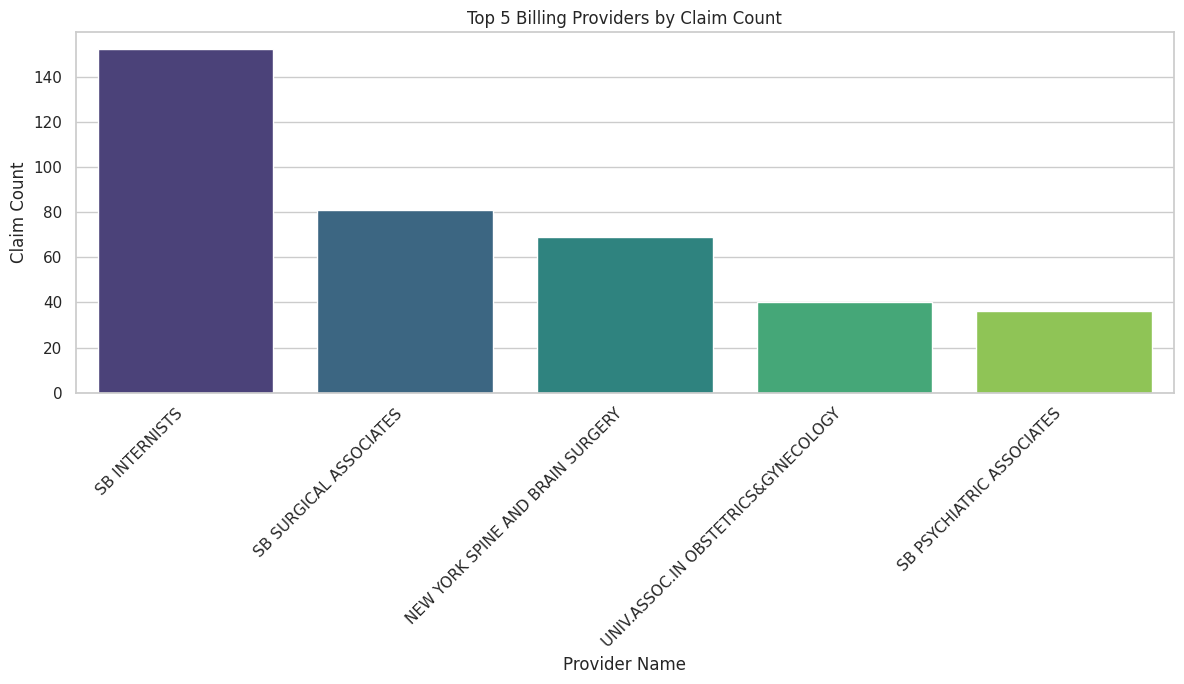

In [122]:
# Bar Chart Visualization

plt.figure(figsize=(12, 7))
sns.barplot(x='Provider Name', y='Claim Count', data=top_providers_with_npi, palette='viridis', hue='Provider Name', legend=False)
plt.title('Top 5 Billing Providers by Claim Count')
plt.xlabel('Provider Name')
plt.ylabel('Claim Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Question 2: Payer Mix Analysis

In [123]:
# Count claims by payer

payer_counts = df_header['PrimaryPayerName'].value_counts().head(5)
total_claims = len(df_header)

In [124]:
# Calculate percentages

payer_pct = (payer_counts / total_claims * 100).round(2)

print("TOP 5 PRIMARY PAYERS BY CLAIM VOLUME")
print("="*60)
payer_df = pd.DataFrame({
    'Payer Name': payer_counts.index,
    'Claim Count': payer_counts.values,
    'Percentage': payer_pct.values
})
display(payer_df)

TOP 5 PRIMARY PAYERS BY CLAIM VOLUME


,Payer Name,Claim Count,Percentage
0,MEDICARE,242,62.37
1,HEALTHFIRST FFS,46,11.86
2,FIDELIS/BETTER HEALTH PLAN,26,6.70
3,HIP MEDICAID,17,4.38
4,HEALTHFIRST CAPITATED,10,2.58


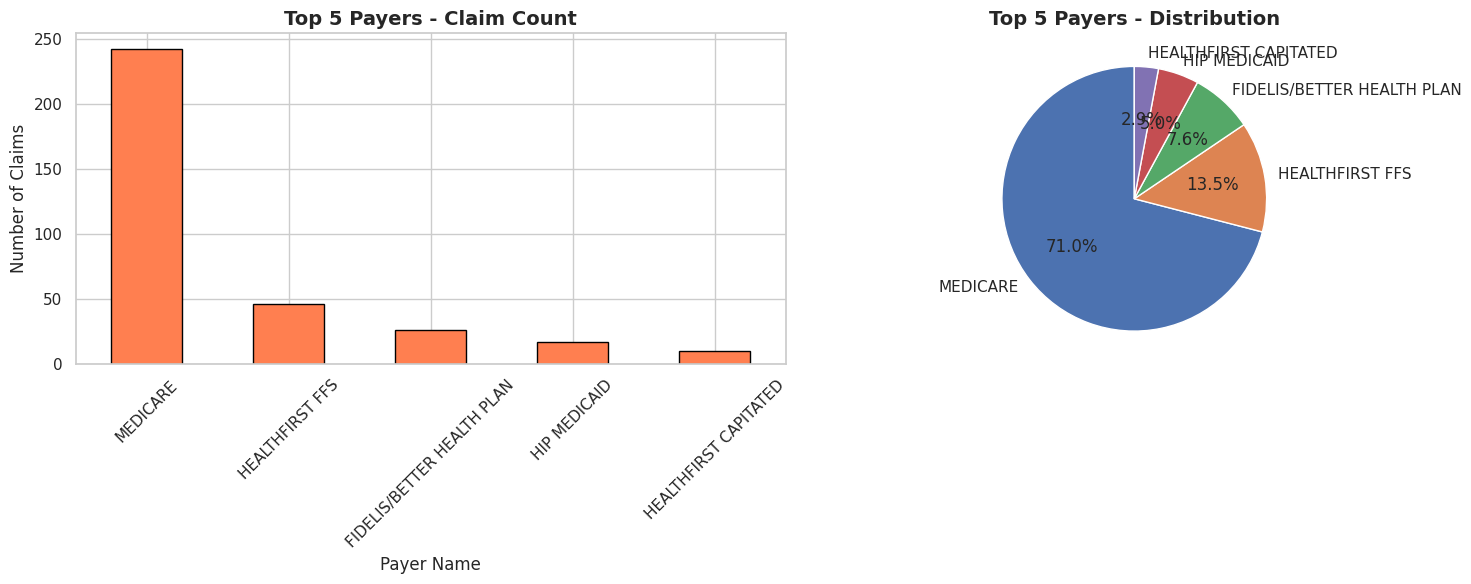

In [125]:
# Create visualizations

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar Chart

payer_counts.plot(kind='bar', ax=ax1, color='coral', edgecolor='black')
ax1.set_title('Top 5 Payers - Claim Count', fontsize=14, fontweight='bold')
ax1.set_xlabel('Payer Name', fontsize=12)
ax1.set_ylabel('Number of Claims', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Pie Chart

ax2.pie(payer_pct.values, labels=payer_pct.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Top 5 Payers - Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## Question 3: Common Diagnoses

In [126]:
# 10 most frequently appearing diagnosis codes

diagnosis_counts = df_code['CodeValue'].value_counts().head(10)

print("TOP 10 MOST FREQUENT DIAGNOSIS CODES (ICD-10)")
print("="*60)
diagnosis_df = pd.DataFrame({
    'ICD-10 Code': diagnosis_counts.index,
    'Frequency': diagnosis_counts.values
})
display(diagnosis_df)


TOP 10 MOST FREQUENT DIAGNOSIS CODES (ICD-10)


,ICD-10 Code,Frequency
0,J96.01,62
1,I10,49
2,E78.5,49
3,G93.5,34
4,D64.9,29
5,I25.10,27
6,I61.9,26
7,I48.91,24
8,I60.8,24
9,I50.9,22


## Question 4: Common Procedures

In [127]:
# Top 10 most frequently billed procedure codes (HCPCS)

# Group by HCPCS and ClientProcedureName to get frequencies

procedure_counts = df_line.groupby(['HCPCS', 'ClientProcedureName']).size().reset_index(name='Frequency')

# Sort by frequency in descending order and get the top 10

top_10_procedures = procedure_counts.sort_values(by='Frequency', ascending=False).head(10)

# Display the results

print("TOP 10 MOST FREQUENTLY BILLED PROCEDURE CODES (HCPCS)")
print("="*60)
display(top_10_procedures)

TOP 10 MOST FREQUENTLY BILLED PROCEDURE CODES (HCPCS)


,HCPCS,ClientProcedureName,Frequency
104,99291,"CRITICAL CARE, INITIAL FIRST HOUR",68
89,99222,INITIAL HOSPITAL CARE PER DAY FOR THE E&M OF ...,30
96,99233,"SUBSEQ. HOSP CARE DETAILED INTERVAL HX,EX,HIGH...",27
91,99223,"INITIAL HOSPITAL CARE PER DAY,FOR THE E&M OF ...",24
81,99213,"OFFICE/OUTPATIENT VISIT,ESTABL.PT,EXPANDED HX,...",19
98,99233,"SUBSEQUENT HOSP. CARE,PER DAY,FOR THE E&M OF A...",18
44,90833,"PSYCHOTHERAPY WITH AN E&M SERVICE,30 MINS,PATI...",16
80,99213,OFFICE/OUTPATIENT VISIT FOR E&M OF ESTAB PATI...,15
48,92557,COMPREHENSIVE AUDIOMETRY THRESHOLD EVALUATION;...,14
109,99442,TELEPHONE SERVICES MD/NPP;11-20 MINUTES......,13


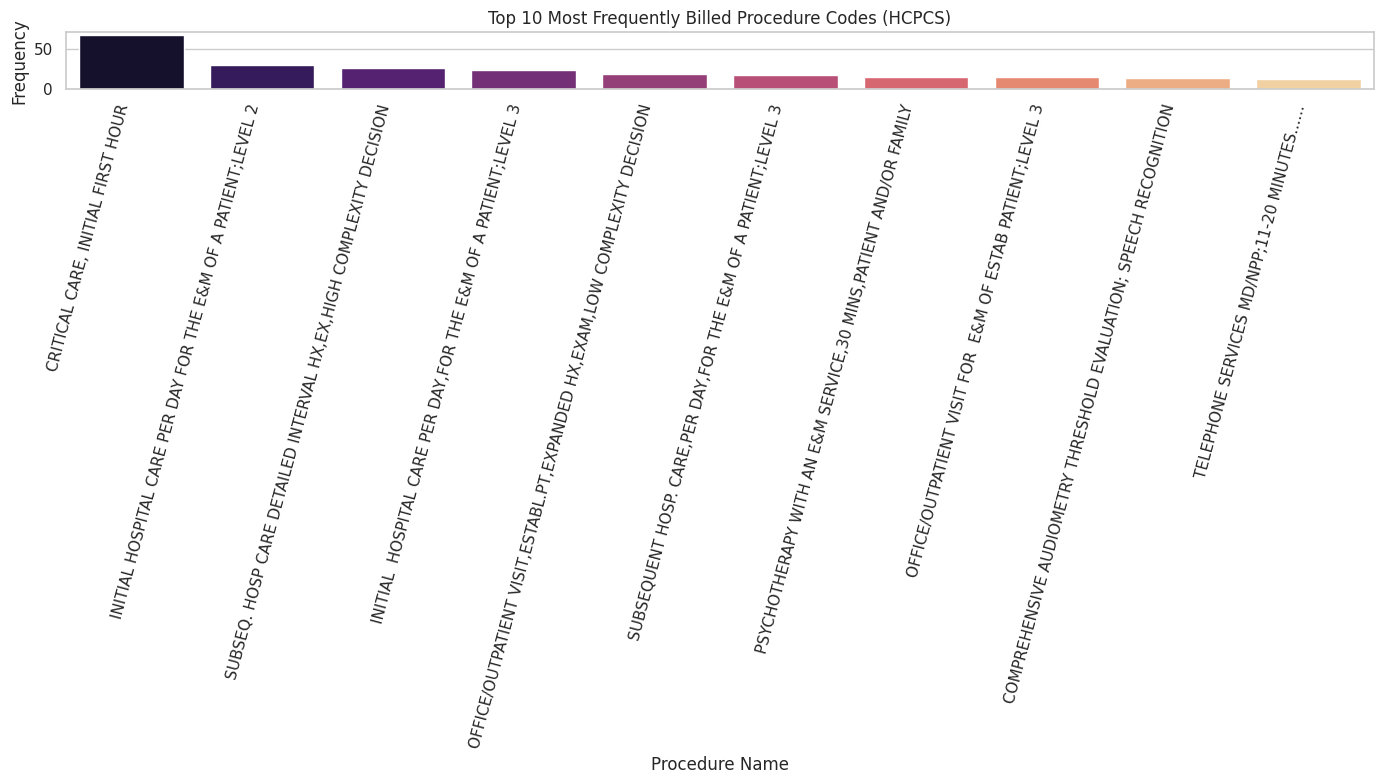

In [128]:
# Bar Chart Visualization for Top 10 Procedures

plt.figure(figsize=(14, 8))
sns.barplot(x='ClientProcedureName', y='Frequency', data=top_10_procedures, palette='magma', hue='ClientProcedureName', legend=False)
plt.title('Top 10 Most Frequently Billed Procedure Codes (HCPCS)')
plt.xlabel('Procedure Name')
plt.ylabel('Frequency')
plt.xticks(rotation=75, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

## Question 5: Service Location Analysis

In [129]:
# Claims submitted for each PlaceOfService

pos_counts = df_header['PlaceOfService'].value_counts()
pos_pct = (pos_counts / len(df_header) * 100).round(2)

print("CLAIMS BY PLACE OF SERVICE")
print("="*60)
pos_df = pd.DataFrame({
    'Place of Service': pos_counts.index,
    'Claim Count': pos_counts.values,
    'Percentage': pos_pct.values
})
display(pos_df)


CLAIMS BY PLACE OF SERVICE


,Place of Service,Claim Count,Percentage
0,21,231,59.54
1,11,132,34.02
2,22,24,6.19
3,23,1,0.26


In [130]:
# Calculate percentage of claims for 'INPATIENT' vs 'DOCTOR\'S OFFICE'

# Assuming Code 21 is 'INPATIENT' and Code 11 is 'DOCTOR\'S OFFICE'

inpatient_claims = pos_counts.get(21, 0) # Use .get() to safely handle cases where the code might not exist
office_claims = pos_counts.get(11, 0) # Use .get() to safely handle cases where the code might not exist

total_relevant_claims = inpatient_claims + office_claims

if total_relevant_claims > 0:
    inpatient_pct = (inpatient_claims / total_relevant_claims) * 100
    office_pct = (office_claims / total_relevant_claims) * 100
    print(f"\nPercentage of 'INPATIENT' claims (Code 21): {inpatient_pct:.2f}%")
    print(f"Percentage of 'DOCTOR\'S OFFICE' claims (Code 11): {office_pct:.2f}%")
else:
    print("No claims found for 'INPATIENT' (Code 21) or 'DOCTOR\'S OFFICE' (Code 11) in the relevant claims.")


Percentage of 'INPATIENT' claims (Code 21): 63.64%
Percentage of 'DOCTOR'S OFFICE' claims (Code 11): 36.36%


# Part 3: Advanced Analysis with JOINS


## Question 6: Claims with High Service Line Counts

In [131]:
# Merge HEADER and LINE files

merged_hl = df_header.merge(df_line, on='ProspectiveClaimId', how='inner')

# Calculate service lines per claim

lines_per_claim = merged_hl.groupby('ProspectiveClaimId').agg({
    'LinePos': 'count',
    'BillingProvFirstName': 'first', # Corrected column name
    'Charges': 'sum'
}).rename(columns={'LinePos': 'ServiceLineCount', 'BillingProvFirstName': 'BillingProviderName', 'Charges': 'TotalCharges'})

# Filter for 5+ lines

high_line_claims = lines_per_claim[lines_per_claim['ServiceLineCount'] >= 5].sort_values(
    'ServiceLineCount', ascending=False
)

print("CLAIMS WITH 5+ SERVICE LINES")
print("="*60)
print(f"Total claims with 5+ lines: {len(high_line_claims):,}")
print(f"\nTop 10 claims by service line count:")
display(high_line_claims.head(10))

CLAIMS WITH 5+ SERVICE LINES
Total claims with 5+ lines: 5

Top 10 claims by service line count:


,ServiceLineCount,BillingProviderName,TotalCharges
ProspectiveClaimId,,,
36794825,7,SB CHILDREN'S SERVICE,1163
36668119,6,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,1030
36740402,6,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,945
36710175,5,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,873
36757684,5,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,873


## Question 7: Diagnosis-Procedure Combinations

In [132]:
# Three-way merge

merged_all = df_header.merge(df_line, on='ProspectiveClaimId', how='inner')
merged_all = merged_all.merge(df_code, on='ProspectiveClaimId', how='inner')

# Filter for CPT 99291

cpt_99291 = merged_all[merged_all['HCPCS'] == '99291']

# Find most common diagnosis

if len(cpt_99291) > 0:
    diagnosis_with_99291 = cpt_99291['CodeValue'].value_counts().head(10)

    print("MOST COMMON DIAGNOSES ASSOCIATED WITH CPT 99291")
    print("="*60)
    print("CPT 99291: Critical care, evaluation and management (first 30-74 min)")
    print(f"\nTotal occurrences of CPT 99291: {len(cpt_99291):,}")
    print(f"\nTop 10 associated diagnosis codes:")

    diag_df = pd.DataFrame({
        'ICD-10 Code': diagnosis_with_99291.index,
        'Frequency': diagnosis_with_99291.values
    })
    display(diag_df)


MOST COMMON DIAGNOSES ASSOCIATED WITH CPT 99291
CPT 99291: Critical care, evaluation and management (first 30-74 min)

Total occurrences of CPT 99291: 636

Top 10 associated diagnosis codes:


,ICD-10 Code,Frequency
0,J96.01,53
1,G93.5,34
2,E78.5,33
3,I61.9,26
4,D64.9,25
5,I10,24
6,I60.8,24
7,I95.9,20
8,D72.829,19
9,I67.848,17


## Question 8: Charges by Payer

In [133]:
# Merge HEADER and LINE for charges analysis

merged_charges = df_header.merge(df_line, on='ProspectiveClaimId', how='inner')

# Group by payer

payer_charges = merged_charges.groupby('PrimaryPayerName')['Charges'].agg([
    ('TotalCharges', 'sum'),
    ('AvgCharges', 'mean'),
    ('ClaimCount', 'size')
]).sort_values('TotalCharges', ascending=False)

print("CHARGES BY PRIMARY PAYER (Top 10)")
print("="*60)
display(payer_charges.head(10))

CHARGES BY PRIMARY PAYER (Top 10)


,TotalCharges,AvgCharges,ClaimCount
PrimaryPayerName,,,
MEDICARE,131008,436.693333,300
HEALTHFIRST FFS,29794,408.136986,73
FIDELIS/BETTER HEALTH PLAN,10810,292.162162,37
HIP MEDICAID,10014,222.533333,45
AETNA,6930,1155.000000,6
DIRECT SELF PAY,6575,1095.833333,6
UNITED COMMUNITY PLAN GOVT PROGRAM,5175,862.500000,6
HEALTHFIRST CAPITATED,4905,350.357143,14
EMPIRE BLUE SR,4620,1155.000000,4


# Part 4: Creative Analysis


## Question 9: Creative Analysis: Which providers handle the most complex cases (highest avg diagnosis codes)

In [134]:
# Merge header with code file

complexity_analysis = df_header.merge(df_code, on='ProspectiveClaimId', how='inner')

# Calculate diagnosis count per claim per provider

provider_complexity = complexity_analysis.groupby(['BillingProvFirstName', 'ProspectiveClaimId']).size().reset_index(name='DiagnosisCount')

# Calculate average complexity per provider

avg_complexity = provider_complexity.groupby('BillingProvFirstName').agg({
    'DiagnosisCount': ['mean', 'max'],
    'ProspectiveClaimId': 'count'
}).round(2)

avg_complexity.columns = ['AvgDiagnosisCount', 'MaxDiagnosisCount', 'TotalClaims']
avg_complexity = avg_complexity.sort_values('AvgDiagnosisCount', ascending=False).head(10)

print("PROVIDER CASE COMPLEXITY ANALYSIS")
print("="*60)
print("Providers ranked by average number of diagnosis codes per claim")
print("(Higher values indicate more complex cases)")
print()
display(avg_complexity)

PROVIDER CASE COMPLEXITY ANALYSIS
Providers ranked by average number of diagnosis codes per claim
(Higher values indicate more complex cases)



,AvgDiagnosisCount,MaxDiagnosisCount,TotalClaims
BillingProvFirstName,,,
NEW YORK SPINE AND BRAIN SURGERY,9.23,12,69
SB FAMILY AND PREVENTIVE MEDICINE,7.00,7,1
SB INTERNISTS,3.59,10,152
SB CHILDREN'S SERVICE,3.33,8,9
UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,2.12,5,40
SB SURGICAL ASSOCIATES,2.05,5,81
SB PSYCHIATRIC ASSOCIATES,1.81,4,36


New York Spine and Brain Surgery had more complex cases indicated from the high average diagnosis count.

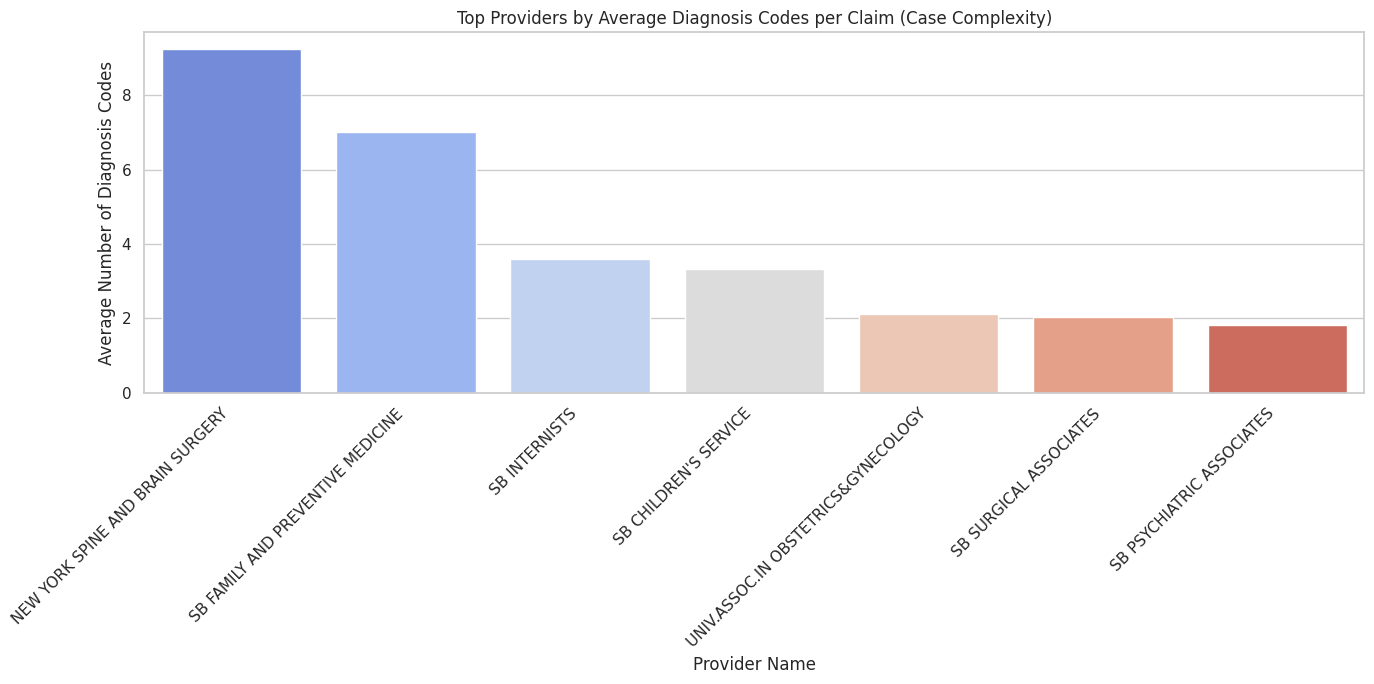

In [135]:
# Visualization of Provider Case Complexity

plt.figure(figsize=(14, 7))
sns.barplot(x=avg_complexity.index, y='AvgDiagnosisCount', data=avg_complexity, palette='coolwarm', hue=avg_complexity.index, legend=False)
plt.title('Top Providers by Average Diagnosis Codes per Claim (Case Complexity)')
plt.xlabel('Provider Name')
plt.ylabel('Average Number of Diagnosis Codes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()